Edureka_class14_case_study_2

In [36]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [37]:
glass = pd.read_csv('C:\\edureka\\PR_class_14\\Data_set\\glass.csv')
glass.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Plotting the different type of glasses

Text(0, 0.5, 'Type')

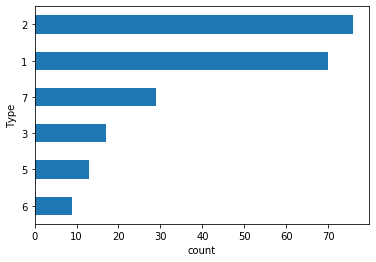

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
glass.Type.value_counts().sort_values().plot('barh')
plt.xlabel('count')
plt.ylabel('Type')

test train split

In [39]:
X = glass.iloc[:,0:9]
y = glass[['Type']]
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=5)

Fitting the decision tree model

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
depth_range = range(1,7)
score = []
for i in depth_range:
    treeClf = DecisionTreeClassifier(max_depth = i, random_state = 1)
    treeClf.fit(X_train,y_train)
    y_pred = treeClf.predict(X_test)  
    score.append(metrics.accuracy_score(y_test,y_pred))
dict(zip(depth_range,score))    

{1: 0.46153846153846156,
 2: 0.6923076923076923,
 3: 0.6615384615384615,
 4: 0.6923076923076923,
 5: 0.7230769230769231,
 6: 0.7846153846153846}

K Fold cross validation

In [41]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=3, random_state=5)
treeClf = DecisionTreeClassifier(max_depth = 6, random_state = 5)
results = model_selection.cross_val_score(treeClf, X, y, cv=kfold, scoring='accuracy')
print(results)

[0.01388889 0.25352113 0.01408451]


Using Grid search cv and Random Forest with hyper parameter tuning

In [49]:
from sklearn.model_selection import GridSearchCV
est_range=np.array(range(1,30))
param_grid=dict(n_estimators=est_range)
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(param_grid)
grid = GridSearchCV(RFC,param_grid,cv=10,scoring='accuracy')
grid.fit(X,y)
results = pd.DataFrame(grid.cv_results_)
results[['mean_test_score', 'std_test_score', 'params']]


,mean_test_score,std_test_score,params
0,0.546729,0.086367,{'n_estimators': 1}
1,0.584112,0.102474,{'n_estimators': 2}
2,0.682243,0.095329,{'n_estimators': 3}
3,0.668224,0.124357,{'n_estimators': 4}
4,0.682243,0.109386,{'n_estimators': 5}
5,0.663551,0.097267,{'n_estimators': 6}
6,0.705607,0.105447,{'n_estimators': 7}
7,0.700935,0.097729,{'n_estimators': 8}
8,0.696262,0.096150,{'n_estimators': 9}
9,0.728972,0.098611,{'n_estimators': 10}


In [50]:
print(grid.best_score_)

0.7383177570093458


In [51]:
print(grid.best_params_)

{'n_estimators': 21}


In [52]:
print(grid.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Thus the best n_estimator value is 21 with an accuracy of 0.74